In [1]:
import s3fs, xarray as xr
import matplotlib.pyplot as plt
import afloat
import afloat.plot.plotting as zplot
import afloat.config as config
import os

config_dict = config.parse_config_file()
config.get('afloat-extras', home_dir=None)

sol_Nas_root = r'\\sol-nas\Data\Field Trips\Trip8023'
sol_Nas_root = r'C:\Users\00071913\OneDrive - The University of Western Australia\EXT_MNF_2001 Field Planning (Internal)\Sol-nas Backup'

sol_Nas_root = r'/mnt/c/Users/00071913/OneDrive - UWA/EXT_MNF_2001 Field Planning (Internal)/Sol-nas Backup'


# IMOS AODN 

http://imos-data.s3-website-ap-southeast-2.amazonaws.com/?prefix=IMOS/

# Load Himawari 9 
Only have Jan 2023 at the moment


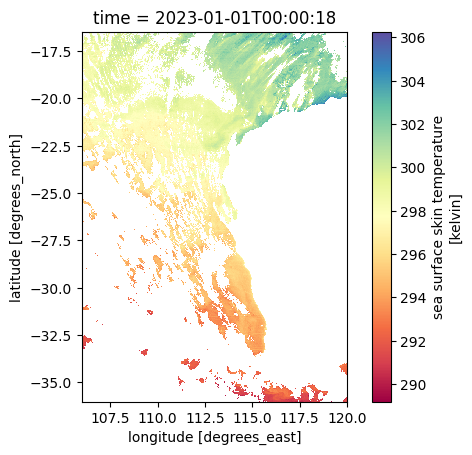

In [2]:
himawari_rel = r'Data/SST/20230101000000-JAXA-L3C_GHRSST-SSTskin-H09_AHI_NRT-v2.1-v02.0-fv01.0_crop.nc'

himawari = os.path.join(sol_Nas_root, himawari_rel)

# r'Data\SST\20230101000000-JAXA-L3C_GHRSST-SSTskin-H09_AHI_NRT-v2.1-v02.0-fv01.0_crop.nc'

him_ds = xr.open_dataset(himawari)

him_ds.sea_surface_temperature.plot(cmap='Spectral')
plt.gca().set_aspect('equal')

# Plot SWOT CALVAL

In [3]:
def plot_SWOT_CV_nws():
    
    sfs = [os.path.join(sol_Nas_root, r'GIS/SWOT CALVAL SWATH PASS 21.shp'),
           os.path.join(sol_Nas_root, r'GIS/SWOT CALVAL SWATH PASS 8.shp'),
         ]

    for sf in sfs:
        afloat.plot.plotting.quick_shape_fill(sf, collection_kwargs={'facecolor':'red', 'alpha':0.5, 'edgecolor': 'k'})


Text(0.5, 1.0, 'SWOT Cal-Val orbits over Western Australia')

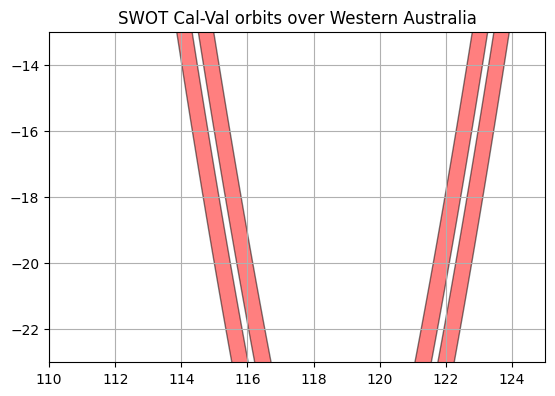

In [4]:
verts = zplot.auscoast_fill(ax=None)

plt.xlim(110, 125)
plt.ylim(-23, -13)
plt.gca().set_aspect('equal')

plot_SWOT_CV_nws()
plt.grid()
plt.title('SWOT Cal-Val orbits over Western Australia')


Figure size is 14.0 x 12.0 cm
Selected resolution: i


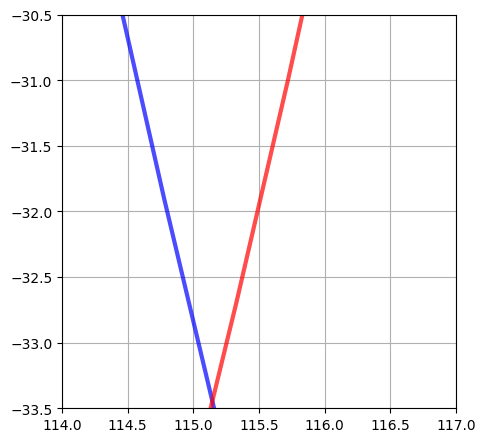

In [5]:

def plot_SWOT_exmouth(ax, alpha=0.4):
    
    sfs_s = [os.path.join(sol_Nas_root, r'GIS/SWOT SCIENCE PASS 62 SWATH.shp'),
             os.path.join(sol_Nas_root, r'GIS/SWOT SCIENCE PASS 131 SWATH.shp'),
         ]

    sfs_n = [os.path.join(sol_Nas_root, r'GIS/SWOT SCIENCE PASS 62 NADIR.shp'),
             os.path.join(sol_Nas_root, r'GIS/SWOT SCIENCE PASS 131 NADIR.shp'),
     ]
    
    plot_SWOT(ax, sfs_s, sfs_n, alpha=alpha, cols = {'red', 'blue'})
    
def plot_SWOT_perth(ax, alpha=0.4):
    
    sfs_s = [os.path.join(sol_Nas_root, r'GIS/SWOT SCIENCE PASS 368 SWATH.shp'),
             os.path.join(sol_Nas_root, r'GIS/SWOT SCIENCE PASS 381 SWATH.shp'),
         ]

    sfs_n = [os.path.join(sol_Nas_root, r'GIS/SWOT SCIENCE PASS 368 NADIR.shp'),
             os.path.join(sol_Nas_root, r'GIS/SWOT SCIENCE PASS 381 NADIR.shp'),
     ]
    
    plot_SWOT(ax, sfs_s, sfs_n, alpha=alpha, cols = {'red', 'blue'})
    
def plot_SWOT(ax, sfs_s, sfs_n, alpha=0.5, cols=None):
        
    if cols is None:
        cols = ['red']*len(sfs_s)
    
    for sf, col in zip(sfs_s, cols):
        afloat.plot.plotting.quick_shape_fill(sf, ax=ax, collection_kwargs={'facecolor': col, 'alpha':alpha, 'edgecolor': 'k'})

    for sf, col in zip(sfs_n, cols):
        afloat.plot.plotting.quick_shape_plot(sf, ax=ax, plot_kwargs={'color': col, 'alpha': (alpha+1)/2, 'lw': 3})

    ax.set_aspect('equal')

# verts = zplot.auscoast_fill(ax=None)

zl = zplot.axis_layer(widths = [10, 1], heights=[10], verbose=False)
# cax = zl.lay(0, 1)
ax = zl.lay(0, 0)

verts = zplot.global_coast_fill(ax=ax, resolution='i') # Make 'full' for publication
plot_SWOT_perth(ax=ax)

yl = [-33.5, -30.5]
plt.xlim(114, 117)
plt.ylim(yl)
plt.grid()
plt.show()

plt.show()



Figure size is 14.0 x 12.0 cm


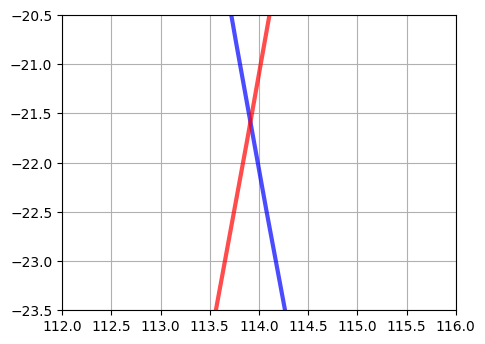

In [6]:
zl = zplot.axis_layer(widths = [10, 1], heights=[10], verbose=False)
# cax = zl.lay(0, 1)
ax = zl.lay(0, 0)

zplot.auscoast_fill(ax)
plot_SWOT_exmouth(ax)

yl = [-23.5, -20.5]
plt.xlim(112, 116)
plt.ylim(yl)
plt.grid()

# Pull NWA radar for the same time

In [57]:
s3 = s3fs.S3FileSystem(anon=True)

files_nwa = s3.ls('imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2022/12/05/')
files_nwa = []
for day in range(27, 30):
    files_nwa += s3.ls(f'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/{day:02d}/')

aws_url_nwa = files_nwa[0]

with s3.open(aws_url_nwa) as fileObj:
    ds_nwa = xr.open_dataset(fileObj, engine='h5netcdf')
    print('Dataset open')
    ds_nwa.load()
    print('Dataset loaded')
    

Dataset open
Dataset loaded


In [59]:
files_nwa

['imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/IMOS_ACORN_V_20250327T003000Z_NWA_FV01_1-hour-avg.nc',
 'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/IMOS_ACORN_V_20250327T013000Z_NWA_FV01_1-hour-avg.nc',
 'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/IMOS_ACORN_V_20250327T023000Z_NWA_FV01_1-hour-avg.nc',
 'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/IMOS_ACORN_V_20250327T033000Z_NWA_FV01_1-hour-avg.nc',
 'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/IMOS_ACORN_V_20250327T043000Z_NWA_FV01_1-hour-avg.nc',
 'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/IMOS_ACORN_V_20250327T053000Z_NWA_FV01_1-hour-avg.nc',
 'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/IMOS_ACORN_V_20250327T063000Z_NWA_FV01_1-hour-avg.nc',
 'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/IMOS_ACORN_V_20250327T073000Z_NWA_FV01_1-hour-avg.nc',
 'imos-data/IMOS

Figure size is 14.0 x 12.0 cm
CPU times: user 622 ms, sys: 33 ms, total: 655 ms
Wall time: 963 ms


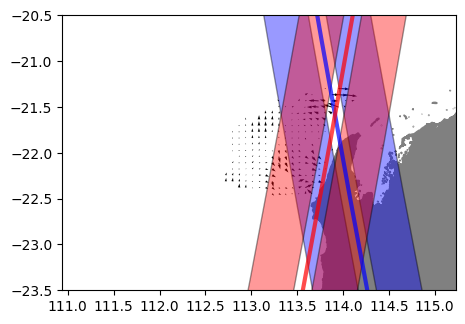

In [60]:
%%time

zl = zplot.axis_layer(widths = [10, 1], heights=[10], verbose=False)
# cax = zl.lay(0, 1)
ax = zl.lay(0, 0)

lat = ds_nwa.LATITUDE
lon = ds_nwa.LONGITUDE
U   = ds_nwa.UCUR[0, :, :]
V   = ds_nwa.VCUR[0, :, :]

plt.quiver(lon, lat, U, V, scale=20)

xl = plt.gca().get_xlim()
yl = plt.gca().get_ylim()
yl = [-23.5, -20.5]

zplot.auscoast_fill(ax)
plot_SWOT_exmouth(ax)

plt.xlim(xl)
plt.ylim(yl)
plt.gca().set_aspect('equal')
# plt.grid()



In [61]:
import numpy as np

xs = np.arange(0, 10)
ys = np.arange(10, 20)

out = list(zip(xs, ys))
type(out)

list

In [62]:
def trim_da_to_axis(da, ax, lat_name='lat', lon_name='lon'):
    
    xl = ax.get_xlim()
    yl = ax.get_ylim()
    
    print(xl)
    print(yl)

    da_ = da.sel({lat_name: slice(yl[0], yl[1]), lon_name: slice(xl[0], xl[1])})
    da_ = da.sel({lat_name: slice(yl[1], yl[0]), lon_name: slice(xl[0], xl[1])})
    
    return da_
    
temp  = him_ds.sea_surface_temperature[0, :, :] - 273.15
# temp_ = trim_da_to_axis(temp, ax)


Loading SAFE directory: /mnt/c/Users/00071913/OneDrive - UWA/Zulberti/git_repos_other/mnf_ningaloo_2026/DATA/S3A_SL_2_WST____20250328T141450_20250328T155550_20250329T194705_6059_124_124______MAR_O_NT_003.SEN3
no dask
scale_factor: 0.1
add_offset: 3200.0
fill_value: -32768
masked
scaled
Data returned


/home/andrew/anaconda3/envs/surfacecurrents/lib/python3.12/site-packages/eumartools/image_tools.py:178: RuntimeWarning: invalid value encountered in arccos
  dist = R_earth * np.arccos(cos)


Text(0.5, 1.0, 'Mean time of S3 overpass 2025-03-28T14:34:18.000000000')

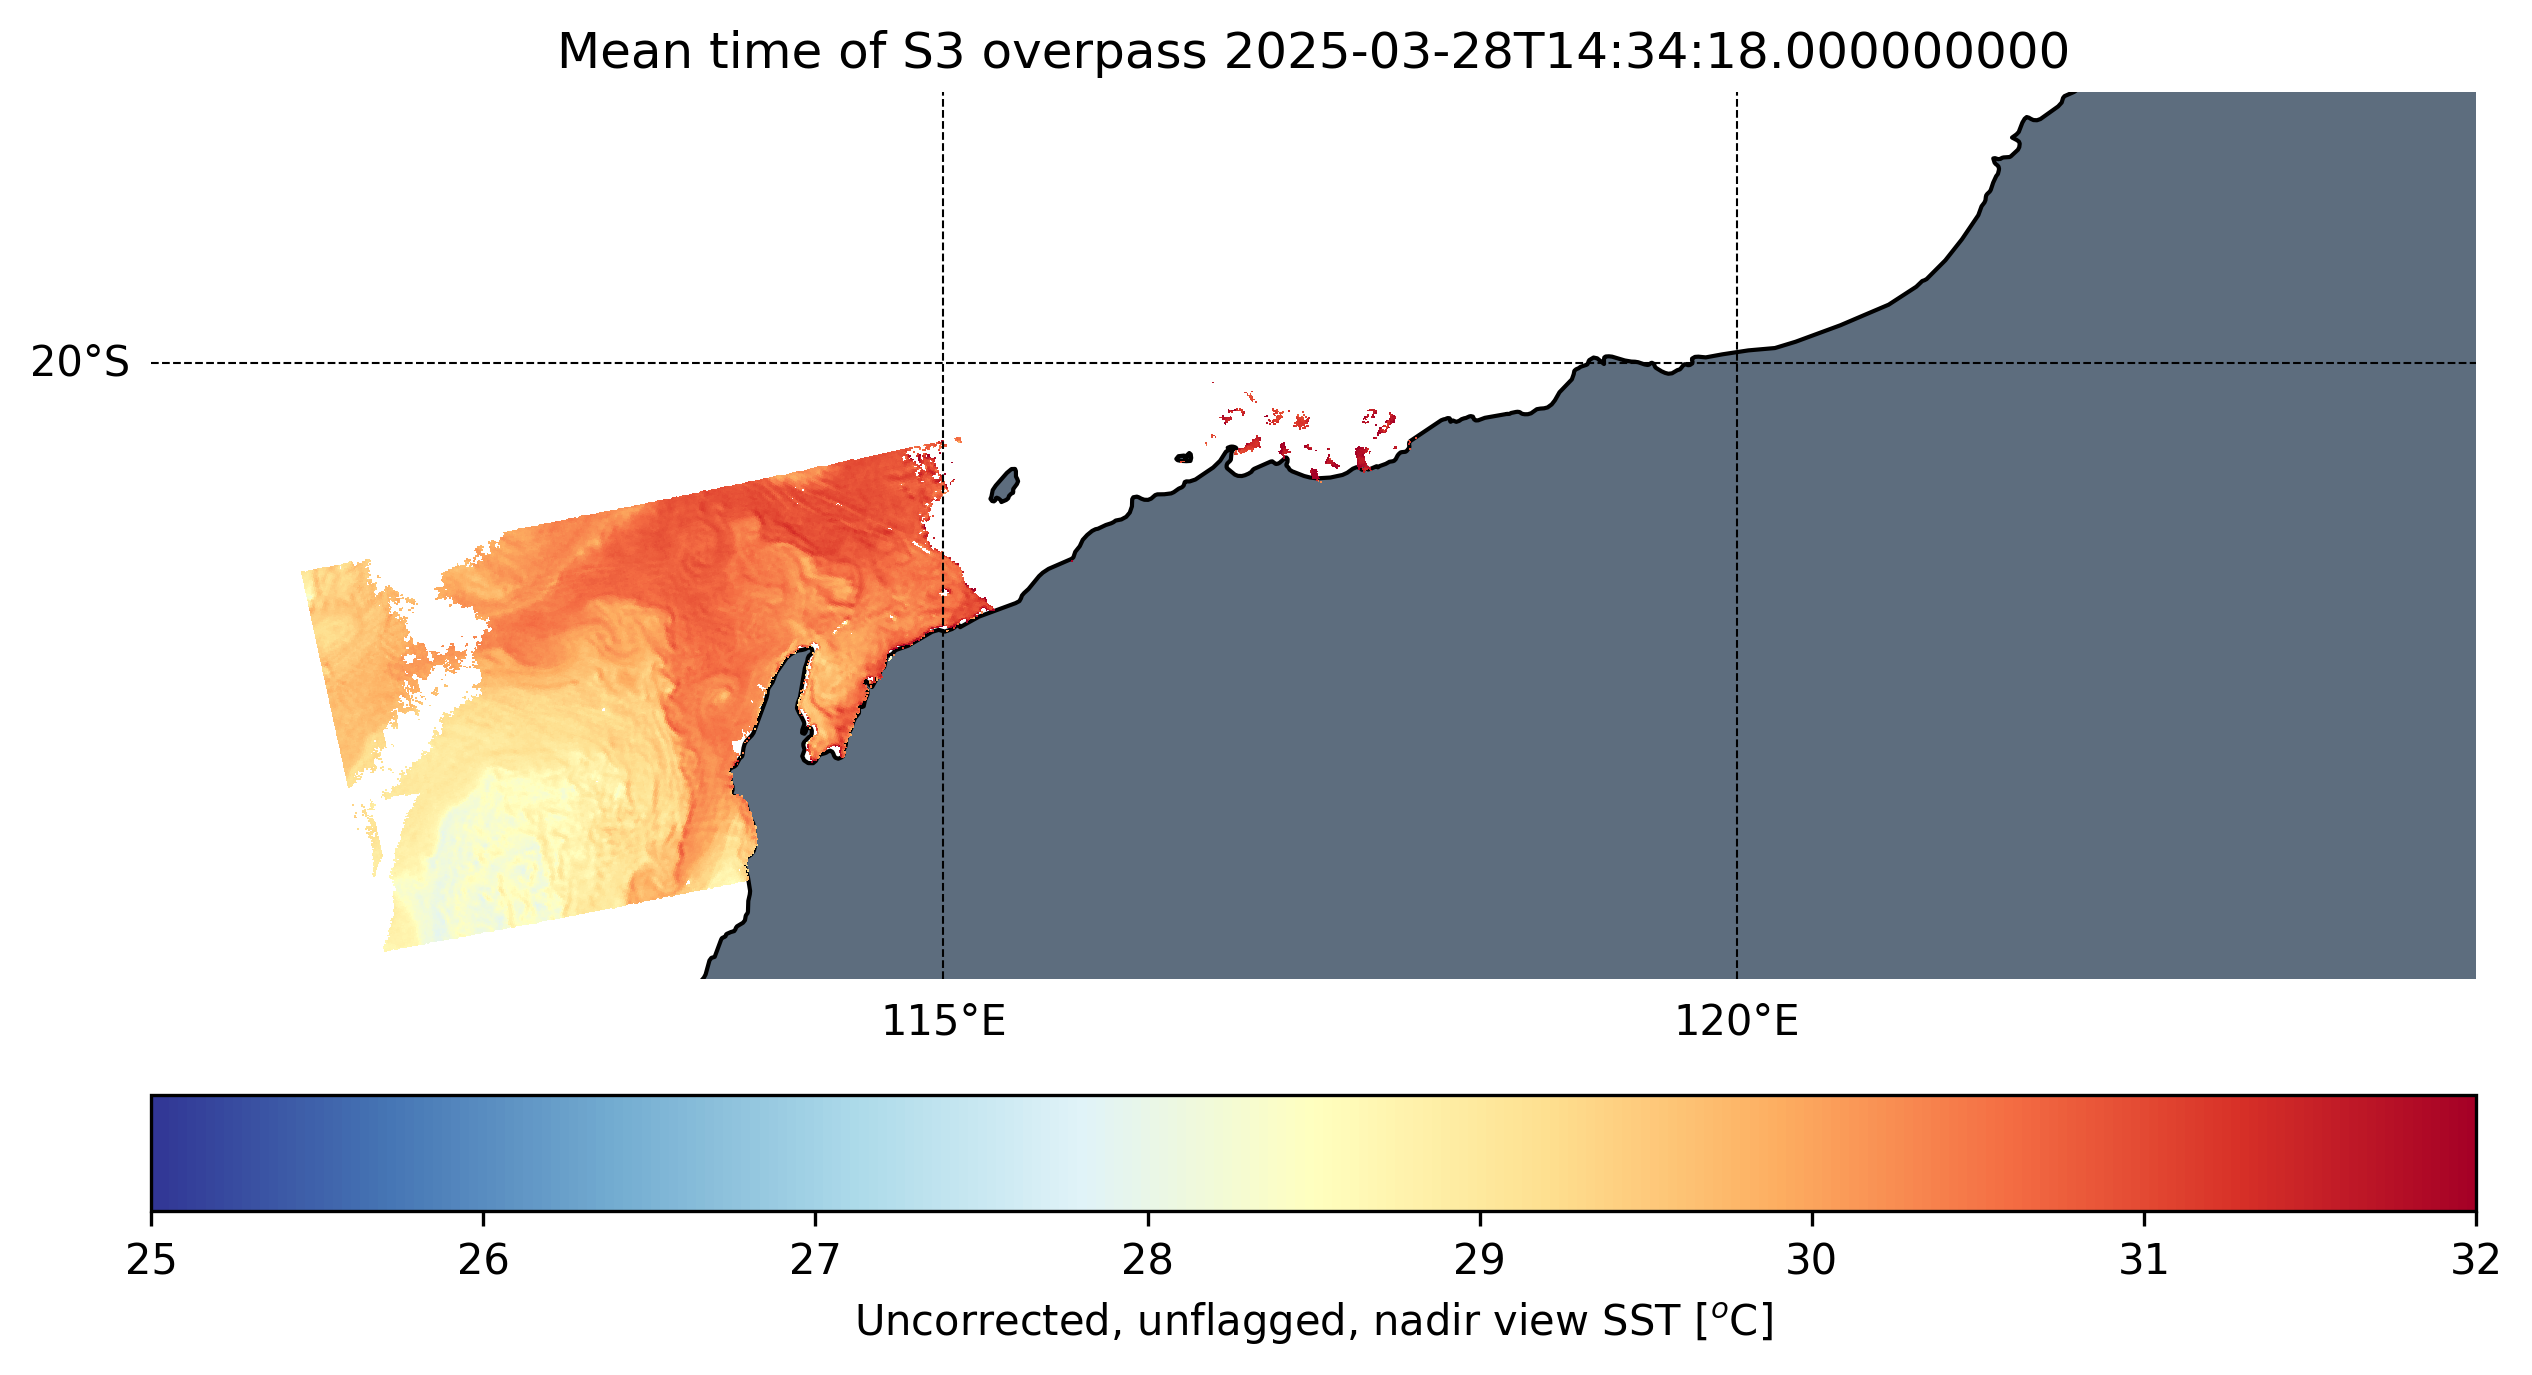

In [91]:
import eumetsat_tools_uwa
import eumartools
import cartopy

# grid sub-sampling parameter
grid_reduce = 5

# Kelvin to Celsius conversion
k_to_c = 273.15

vmin = 25
vmax = 32

fig = plt.figure(figsize=(10, 10), dpi=300)
m = plt.subplot(projection=cartopy.crs.PlateCarree())

coords = {}
coords["EX"] = {}
coords["EX"]["name"] = "Exmouth"
coords["EX"]["lons"] = [112.5,  115., 115.,  112.5, 112.5]
coords["EX"]["lats"] = [-21., -21., -23. , -23., -21., ]
loc='EX'
import cartopy.crs as ccrs

SAFE_directory = "/mnt/c/Users/00071913/OneDrive - UWA/Zulberti/git_repos_other/mnf_ningaloo_2026/DATA/S3A_SL_2_WST____20250328T141450_20250328T155550_20250329T194705_6059_124_124______MAR_O_NT_003.SEN3"
SAFE_directory = "/mnt/c/Users/00071913/OneDrive - UWA/Zulberti/git_repos_other/mnf_ningaloo_2026/DATA/S3A_SL_2_WST____20250328T141450_20250328T155550_20250329T194705_6059_124_124______MAR_O_NT_003.SEN3"

band_vars, sst_dtime = eumetsat_tools_uwa.load_SAFE_directory_nc(SAFE_directory)

item = 'EX'
coords[item]["x"], coords[item]["y"], mask = eumartools.subset_image(np.array(band_vars["lon"]),
                                                                     np.array(band_vars["lat"]),
                                                                     coords[item]["lons"],
                                                                     coords[item]["lats"])


minx = 0 ; maxx = np.shape(band_vars["lon"])[-1]
miny = min(coords[loc]["y"]) ; maxy = max(coords[loc]["y"])

m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')

SST = band_vars["sea_surface_temperature"][0, miny:maxy, minx:maxx]
BIAS = band_vars["sses_bias"][0, miny:maxy, minx:maxx]
ALGORITHM = band_vars["sst_algorithm_type"][0, miny:maxy, minx:maxx]
QUAL = band_vars["quality_level"][0, miny:maxy, minx:maxx]

remove_pixels = np.where((ALGORITHM < 4) | (QUAL < 5))
FINAL_SST = np.array((SST + BIAS) - k_to_c)
FINAL_SST[remove_pixels] = np.nan

# dtimevar = band_vars["sst_dtime"][0, miny:maxy, minx:maxx]
dtimevar = sst_dtime[0, miny:maxy, minx:maxx]

pass_length = np.nanmax(dtimevar) - np.nanmin(dtimevar)
mean_timedelta = np.nanmean(dtimevar)
mean_timedelta = np.timedelta64(int(mean_timedelta), 's')
mean_time = band_vars.time.values[0] + mean_timedelta

mean_time_str = str(mean_time).replace('T', ' ').replace(':', '_').replace('.', '_')
p1 = eumetsat_tools_uwa.slstr_plot(m, band_vars, FINAL_SST, [minx, maxx, miny, maxy, vmin, vmax], cmap=plt.cm.RdYlBu_r)

cbar = fig.colorbar(p1, ax=m, location='bottom', pad=0.05)
cbar.set_label('Corrected, dual look SST [$^{o}$C]')

m.set_title(f"Mean time of S3 overpass {mean_time}")

<>:69: SyntaxWarning: invalid escape sequence '\c'
<>:69: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_18905/2333993240.py:69: SyntaxWarning: invalid escape sequence '\c'
  cax.set_ylabel('SST [$\circ$ C]')


Figure size is 19.80472266666674 x 16.5 cm
Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dataset open
Dataset loaded
[113.517457]
[-22.110601]
(np.float64(111.0), np.float64(116.0))
(np.float64(-24.0), np.float64(-20.0))


/tmp/ipykernel_18905/2333993240.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


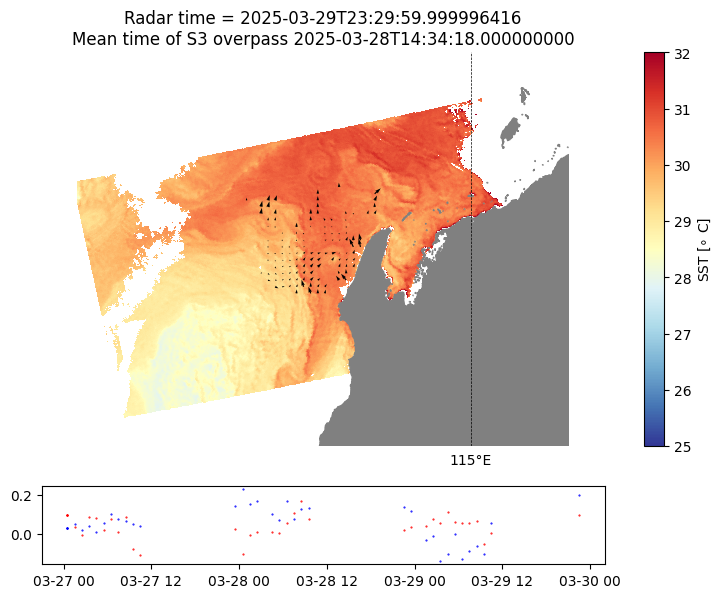

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure(figsize=(10, 10))
zl  = zplot.axis_layer(widths = [10*np.diff(xl)[0]/np.diff(yl)[0], 0.5], heights=[10, 2], left=2, right=2, bottom=1.5, top=2, verbose=False)

cax  = zl.lay(0, 1)
ax   = zl.lay(0, 0, projection=cartopy.crs.PlateCarree())
ax2  = zl.lay(1, 0)

def update(i):

    aws_url_nwa = files_nwa[i]
    
    with s3.open(aws_url_nwa) as fileObj:
        ds_nwa = xr.open_dataset(fileObj, engine='h5netcdf')
        print('Dataset open')
        ds_nwa.load()
        print('Dataset loaded')

    xl = [111, 116]
    yl = [-24, -20]

    cax.clear()
    ax.clear()
    ax.set_xlim(xl)
    ax.set_ylim(yl)

    lat = ds_nwa.LATITUDE
    lon = ds_nwa.LONGITUDE
    U = ds_nwa.UCUR[0, :, :]
    V = ds_nwa.VCUR[0, :, :]

    dlat = lat - -22.1
    dlon = lon - 113.5
    dd = np.sqrt(dlat**2 + dlon**2)
    ind = np.where(dd==np.min(dd))
    lon_ind = ind[1]
    lat_ind = ind[0]
    print(lon.values[lon_ind])
    print(lat.values[lat_ind])

    # xl = ax.get_xlim()
    # yl = ax.get_ylim()

    ax.set_xlim(xl)
    ax.set_ylim(yl)

    temp_ = trim_da_to_axis(temp, ax)
    # out = temp_.plot(cmap='Spectral_r', vmin=25, vmax=29, cbar_ax=cax)
    p1 = eumetsat_tools_uwa.slstr_plot(ax, band_vars, FINAL_SST, [minx, maxx, miny, maxy, vmin, vmax], cmap=plt.cm.RdYlBu_r)

    quiv = ax.quiver(lon, lat, U, V, scale=20)
    quiv2 = ax.quiver(lon[lon_ind], lat[lat_ind], U[lat_ind, lon_ind], V[lat_ind, lon_ind], color='b', scale=20)

    zplot.auscoast_fill(ax)
    # plot_SWOT_exmouth(ax, alpha=0.3)

    ax.set_aspect('equal')
    ax.set_title(None)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax2.plot(ds_nwa.TIME.values[0], U[lat_ind, lon_ind], 'r.', markersize=1, label='U')
    ax2.plot(ds_nwa.TIME.values[0], V[lat_ind, lon_ind], 'b.', markersize=1, label='V')

    cbar = fig.colorbar(p1, ax=ax, cax=cax, pad=0.05)
    cax.set_ylabel('SST [$\circ$ C]')

    ax.set_title(f'Radar time = {ds_nwa.TIME.values[0]}\nMean time of S3 overpass {mean_time}')

    plt.tight_layout()

    return [quiv]

if False:
    update(0)
    update(1)
    plt.savefig('SWOT SST ACORN Exmouth.png')

else:

    ani = animation.FuncAnimation(fig, update, frames=len(files_nwa), interval=50, blit=True)
    # ani = animation.FuncAnimation(fig, update, frames=10, interval=50, blit=True)
    ani.save("../GIF/nwa.gif", writer='pillow', fps=1)

plt.show()

In [88]:
ds_nwa.TIME.values[0]

np.datetime64('2025-03-27T00:29:59.999993344')

# Now radials

In [29]:
files_ptb = s3.ls('imos-data/IMOS/ACORN/radial_quality_controlled/PTB/2025/03/27/')
files_jtc = s3.ls('imos-data/IMOS/ACORN/radial_quality_controlled/JTC/2025/03/27/')

files_ptb = s3.ls('imos-data/IMOS/ACORN/radial/PTB/2025/03/27/')
files_jtc = s3.ls('imos-data/IMOS/ACORN/radial/JTC/2025/03/27/')

aws_url_jtc = files_jtc[0]
aws_url_ptb = files_ptb[0]

with s3.open(aws_url_jtc) as fileObj:
    ds_jtc = xr.open_dataset(fileObj, engine='h5netcdf')
    print('Dataset open')
    ds_jtc.load()
    print('Dataset loaded')

with s3.open(aws_url_ptb) as fileObj:
    ds_ptb = xr.open_dataset(fileObj, engine='h5netcdf')
    print('Dataset open')
    ds_ptb.load()
    print('Dataset loaded')
    

Dataset open
Dataset loaded
Dataset open
Dataset loaded


In [31]:
ds_jtc

<xarray.Dataset> Size: 18kB
Dimensions:                                                            (
                                                                        POSITION: 288,
                                                                        TIME: 1)
Coordinates:
  * POSITION                                                           (POSITION) int32 1kB ...
    LONGITUDE                                                          (POSITION) float64 2kB ...
    LATITUDE                                                           (POSITION) float64 2kB ...
  * TIME                                                               (TIME) datetime64[ns] 8B ...
Data variables: (12/13)
    wera_Header_JTC                                                    |S512 512B ...
    ssr_Station_JTC                                                    |S1 1B ...
    ssr_Surface_Radial_Sea_Water_Speed                                 (POSITION) float32 1kB ...
    ssr_Surface_Radial_Sea_Water_Speed_quality_control                 (POSITION) float32 1kB ...
    ssr_Surface_Radial_Direction_Of_Sea_Water_Velocity                 (POSITION) float32 1kB ...
    ssr_Surface_Radial_Sea_Water_Speed_Standard_Error                  (POSITION) float32 1kB ...
    ...                                                                 ...
    ssr_Power_Spectrum_Noise                                           (POSITION) float32 1kB ...
    ssr_Power_Spectrum_Noise_quality_control                           (POSITION) float32 1kB ...
    ssr_Bragg_Signal_To_Noise                                          (POSITION) float32 1kB ...
    ssr_Bragg_Signal_To_Noise_quality_control                          (POSITION) float32 1kB ...
    wera_Sum_N                                                         (POSITION) float32 1kB ...
    wera_crad_JTC                                                      |S1 1B ...
Attributes: (12/68)
    project:                       Integrated Marine Observing System (IMOS)
    Conventions:                   CF-1.6,IMOS-1.4
    institution:                   IMOS Ocean Radar Facility
    title:                         Northwest Shelf (WA), Jurabi Turtle Centre...
    instrument:                    WERA Oceanographic HF Radar/Helzel Messtec...
    platform_code:                 JTC
    ...                            ...
    ssr_RF_Bandwidth_units:        Hz
    ssr_N_Chirps:                  1024
    ssr_Chirp_Shape:               Sawtooth
    ssr_Chirp_Direction:           Up
    ssr_Chirp_Duration:            0.26
    ssr_Chirp_Duration_units:      s

# Now Rottnest

In [ ]:
s3 = s3fs.S3FileSystem(anon=True)

files_rot_jan23 = s3.ls('imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/ROT/2022/12/05/')
files_rot_jan23 = s3.ls('imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/ROT/2023/01/03/')

aws_url_rot_jan23 = files_rot_jan23[0]

with s3.open(aws_url_rot_jan23) as fileObj:
    ds_rot_jan23 = xr.open_dataset(fileObj, engine='h5netcdf')
    print('Dataset open')
    ds_rot_jan23.load()
    print('Dataset loaded')
    

Dataset open
Dataset loaded


Figure size is 13.5 x 12.0 cm
(114.0, 117.0)
(-33.5, -30.5)
Selected resolution: i


C:\Users\00071913\AppData\Local\Temp\ipykernel_20008\957733200.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


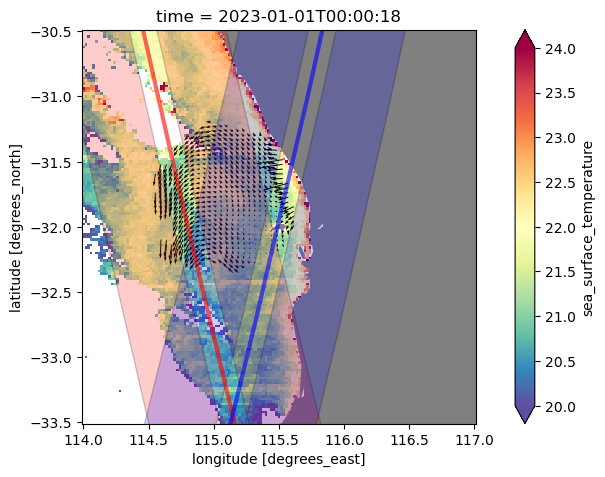

In [ ]:
yl = [-33.5, -30.5]
xl = (114, 117)

zl = zplot.axis_layer(widths = [10*np.diff(xl)[0]/np.diff(yl)[0], 0.5], heights=[10], verbose=False)
cax = zl.lay(0, 1)
ax = zl.lay(0, 0)

lat = ds_rot_jan23.LATITUDE
lon = ds_rot_jan23.LONGITUDE
U = ds_rot_jan23.UCUR[0, :, :]
V = ds_rot_jan23.VCUR[0, :, :]

plt.xlim(xl)
plt.ylim(yl)

temp_ = trim_da_to_axis(temp, ax)
temp_.plot(cmap='Spectral_r', vmin=20, vmax=24, cbar_ax=cax)
plt.quiver(lon, lat, U, V, scale=20)

# verts = zplot.auscoast_fill(ax=None)
verts = zplot.global_coast_fill(ax=ax, resolution='i') # Make 'full' for publication
plot_SWOT_perth(ax, alpha=0.2)

ax.set_aspect('equal')
plt.tight_layout()


# The below would be to plot the full SWOT kml file
Under development


In [ ]:
from os import path

kml_file = ()


SyntaxError: invalid syntax (1643447319.py, line 5)

# Now back to Exmouth for the actual moorings


In [ ]:

from matplotlib.collections import LineCollection
from matplotlib.collections import PolyCollection
import os, warnings

def _quick_shape_plot_(XY, ax=None, plot_kwargs={}):
    """
    Private function 
    """
    if ax is None:
        ax = plt.gca()

        
    if not 'color' in plot_kwargs.keys():
        plot_kwargs['color'] = 'gray'

    line_segments = LineCollection(XY, **plot_kwargs)
    ax.add_collection(line_segments)
    
def quick_shape_plot(sf, ax=None, plot_kwargs={'lw':0.5}, **kwargs):
    """
    Inputs:

    kwargs:
        label: a label that applies to only the first segment [prevents multi labels]
        proj_in_kwargs: projection of the input shape file
        proj_out_kwargs: projection axes [NOT CURRENTLY USED]
        in_to_ll: bool, whether or not to convert to lat long
    """

    import shapefile
    from pyproj import Proj

    label = kwargs.pop('label', None)
    proj_in_kwargs = kwargs.pop('proj_in_kwargs', {'proj':'utm', 'zone':50, 'ellps':'WGS84', 'preserve_units':False})
    proj_out_kwargs = kwargs.pop('proj_out_kwargs', {'proj':'utm', 'zone':50, 'ellps':'WGS84', 'preserve_units':False})
    in_to_ll = kwargs.pop('in_to_ll', False)

    filterdict = kwargs.pop('filterdict', {})
    
    sf = shapefile.Reader(sf)

    # X, Y, XY = [], [], []
    XY = []
    
    filterkeys = filterdict.keys()
#     print('filterdict')
#     print(filterdict)

    for i, shape in enumerate(sf.shapeRecords()):
        # FILTERING STEP
        attrs = shape.record.as_dict()
        skip = False
        for filterkey in filterkeys:
#             print(filterkey)
            filterlist = filterdict[filterkey]
            filterlist

            if not filterkey in attrs.keys():
        #         continue
                skip = True

            if not attrs[filterkey] in filterlist:
                skip = True
                
        if skip:
            continue

        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        # X += [x]
        # Y += [y]

        if in_to_ll:
            p = Proj(**proj_in_kwargs)
            y = [i - 1e7 for i in y]
            x, y = p(x,y,inverse=True)

        if i==0:
            label_ = label
        else:
            label_ = None

        # ax.plot(x, y, '0.5', label=label_, **plot_kwargs)

        XY += [np.array(shape.shape.points)]
        
    _quick_shape_plot_(XY, ax=ax, plot_kwargs=plot_kwargs)

    return XY, plot_kwargs

In [ ]:
mooring_locations = {'N500': [113.67, -22.3],
                     'W500': [113.58, -22.41],
                     'C200': [113.66, -22.39],
                     'C200A': [113.66-0.01, -22.39],
                     'C200B': [113.66, -22.39+0.01],}

[print('{} {:.2f}, {:.2f}'.format(m, mooring_locations[m][0], mooring_locations[m][1])) for m in mooring_locations]

N500 113.67, -22.30
W500 113.58, -22.41
C200 113.66, -22.39
C200A 113.65, -22.39
C200B 113.66, -22.38


[None, None, None, None, None]

In [ ]:
bathy_shape = r'C:\Users\00071913\OneDrive - The University of Western Australia\General - EXT-MNF 2023 application\GIS\ga\NWS_ALL_LEVELS.shp'
bathy_shape = r'C:\Users\00071913\OneDrive - The University of Western Australia\General - EXT-MNF 2023 application\GIS\ga\NWS_ALL_LEVELS.shp'

xl = [111, 116]
xl = [112.5, 115]
yl = [-23, -21.5]

zl = zplot.axis_layer(widths = [10*np.diff(xl)[0]/np.diff(yl)[0], 0.5], heights=[10], left=2, right=2, bottom=1.5, verbose=False)
# cax = zl.lay(0, 1)
ax = zl.lay(0, 0)

lat = ds_nwa_jan23.LATITUDE
lon = ds_nwa_jan23.LONGITUDE
U = ds_nwa_jan23.UCUR[0, :, :]
V = ds_nwa_jan23.VCUR[0, :, :]

# xl = ax.get_xlim()
# yl = ax.get_ylim()

ax.set_xlim(xl)
ax.set_ylim(yl)

temp_ = trim_da_to_axis(temp, ax)
# out = temp_.plot(cmap='Spectral_r', vmin=25, vmax=29, cbar_ax=cax)
q = plt.quiver(lon, lat, U, V, scale=20)
s = q.get_sizes()

zplot.auscoast_fill(ax)
# zplot.quick_shape_plot(bathy_shape)
quick_shape_plot(bathy_shape)
quick_shape_plot(bathy_shape, filterdict={'DEPTH': [-500]}, plot_kwargs={'lw':0.5, 'color':'k'})
quick_shape_plot(bathy_shape, filterdict={'DEPTH': [-200]}, plot_kwargs={'lw':0.5, 'color':'k'})
plot_SWOT_exmouth(ax, alpha=0.2)

ax.set_aspect('equal')
ax.set_title(None)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# cax.set_ylabel('SST [$\circ$ C]')

plt.tight_layout()
plt.grid()

plt.savefig('SWOT SST bathy Exmouth.png')

plt.plot(113.67, -22.3,  'ro')
plt.plot(113.66, -22.39, 'bo')
plt.plot(113.58, -22.41, 'ro')
# ax.set_xlim(xl)
# ax.set_ylim(yl)

plt.xlim(xl)
plt.ylim(yl)

plt.savefig('Exmouth mooring sites.png')

ax.set_xlim([113.4, 113.9])
ax.set_ylim([-22.6, -22.2])

plt.plot(113.66-0.01, -22.39, 'b^')
plt.plot(113.66, -22.39+0.01, 'b^')

q.scale = 5
q.set_lw(1)

plt.savefig('Exmouth mooring sites zoom.png')

NameError: name 'np' is not defined

# Bow-tie now

In [4]:
import utm

def transect_length_nm(tlat, tlon):
    
    (tx, ty, z1, z2) = utm.from_latlon(tlat, tlon)

    dd = np.sqrt( np.diff(tx)**2 + np.diff(ty)**2 )
    distance_km = np.sum(dd)/1000
    distance_nm = 0.539957*distance_km

    return distance_nm

xl = [111, 116]
xl = [112.5, 115]
yl = [-23, -21.5]

zl = zplot.axis_layer(widths = [10*np.diff(xl)[0]/np.diff(yl)[0], 0.5], heights=[10], left=2, right=2, bottom=1.5, verbose=False)
# cax = zl.lay(0, 1)
ax = zl.lay(0, 0)

lat = ds_nwa_jan23.LATITUDE
lon = ds_nwa_jan23.LONGITUDE
U = ds_nwa_jan23.UCUR[0, :, :]
V = ds_nwa_jan23.VCUR[0, :, :]

# xl = ax.get_xlim()
# yl = ax.get_ylim()

ax.set_xlim(xl)
ax.set_ylim(yl)

temp_ = trim_da_to_axis(temp, ax)
# out = temp_.plot(cmap='Spectral_r', vmin=25, vmax=29, cbar_ax=cax)
q = plt.quiver(lon, lat, U, V, scale=20)
s = q.get_sizes()

zplot.auscoast_fill(ax)
if True:
    quick_shape_plot(bathy_shape)
    quick_shape_plot(bathy_shape, filterdict={'DEPTH': [-500]}, plot_kwargs={'lw':0.5, 'color':'k'})
quick_shape_plot(bathy_shape, filterdict={'DEPTH': [-200]}, plot_kwargs={'lw':0.5, 'color':'k'})
plot_SWOT_exmouth(ax, alpha=0.1)

ax.set_aspect('equal')
ax.set_title(None)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# cax.set_ylabel('SST [$\circ$ C]')

plt.tight_layout()

btlat = np.array([  -14.09,
                    -13.77,
                    -14.01,
                    -13.71]) - 8.4

btlon = np.array([  123.12,
                    123.18,
                    122.74,
                    122.8]) - 9.48

def plot_moorings(label='TWC mooring'):
    plt.plot(113.67, -22.3,  'ko', label=label)
    plt.plot(113.66, -22.39, 'ko')
    plt.plot(113.58, -22.41, 'ko')
    
plot_moorings()
    
btlon = np.concatenate([btlon, btlon[0:1]])
btlat = np.concatenate([btlat, btlat[0:1]])
                        
distance_nm = transect_length_nm(btlat, btlon)
text = 'Bowtie transect [{:.0f} nm]'.format(distance_nm)
print(text)

plt.plot(btlon, btlat, 'aquamarine', lw=2, label=text)
plt.grid()

plot_moorings(label=None)

plt.legend()
plt.savefig('Exmouth largescale bow-tie.png')

# ax.set_xlim(xl)
# ax.set_ylim(yl)

plt.xlim(xl)
plt.ylim(yl)

flat = np.linspace(-22.4, -22.2, 14)-0.06
flon = np.linspace(113.51, 113.6, 14)+0.15
flon[0::2] = flon[0::2] - 0.03
                   
distance_nm = transect_length_nm(flat, flon)
text = 'Shelf-break transect [{:.0f} nm]'.format(distance_nm)
print(text)
plt.plot(flon, flat, 'deeppink', lw=2, label=text)

plt.legend()
plot_moorings(label=None)

plt.savefig('Exmouth largescale sb bow-tie.png')


NameError: name 'np' is not defined

In [5]:
[print(lat, lon) for lat, lon in zip(btlat, btlon)]
print()
[print(lat, lon) for lat, lon in zip(flat, flon)]

NameError: name 'btlat' is not defined